In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [3]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [5]:
df.isna().sum().sum()

0

In [6]:
df.duplicated().sum()

141

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21859 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      21859 non-null  object
 1   language  21859 non-null  object
dtypes: object(2)
memory usage: 512.3+ KB


In [9]:
df["Text"][10]


'kemunculan pertamanya adalah ketika mencium kakak kelasnya kyoko sejak yuuki meminta agar sakura merahasiakan hal tersebutlah keduanya menjadi akrab yuuki pun akhirnya menyukai sakura sayangnya tidak disadari oleh sakura dan hanya aiko yang tahu karena takut dibenci sakura yuuki akhirnya menganggap sakura "sahabat spesial"'

In [10]:
df["language"][10]

'Indonesian'

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

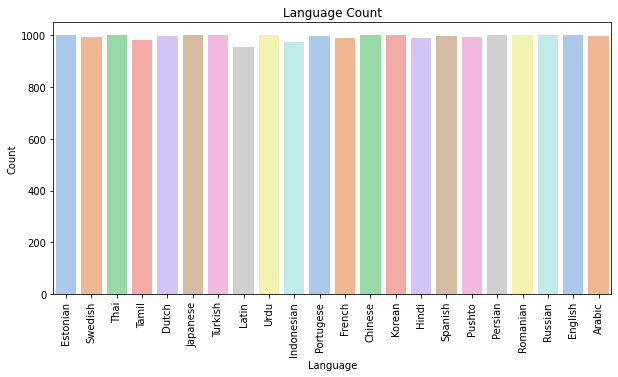

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df["language"].value_counts())
fig = plt.figure(figsize=(10, 5))
g1 = sns.countplot(df.language,palette="pastel");
g1.set_title("Language Count")
g1.set_ylabel("Count")
g1.set_xlabel("Language")
plt.xticks(rotation=90)


In [12]:
df.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [13]:
char = ['\'', '.', ',', '\"', ':', ';', '!', '@', '#', '$', '%', '^', '&',
                 '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '\\', '?', 
                 '/','>', '<', '|', ' ']

In [14]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
def clean_text(text):
    tokens = word_tokenize(text) 
    words = [word.lower() for word in tokens if word not in char]
    words = [PorterStemmer().stem(word) for word in words] 
    return " ".join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
df["clean_text"] = df["Text"].apply(clean_text)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["language_encode"] = le.fit_transform(df["language"])
df.head()

,Text,language,clean_text,language_encode
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma på eng the jesuit an...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclona en ...,2


In [17]:
language_list = [i for i in range(22)]
language_list = le.inverse_transform(language_list)
language_list = language_list.tolist()
language_list

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [19]:
x = df["clean_text"]

cv = CountVectorizer() 
x = cv.fit_transform(x)


x = x.astype('uint8')
y = df["language_encode"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## MultinominalNB

In [21]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

MultinomialNB()

In [22]:
model_NB.score(X_test, y_test)

0.954532852786249

In [23]:
y_pred = model_NB.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy score: ", ac)

Accuracy score:  0.954532852786249


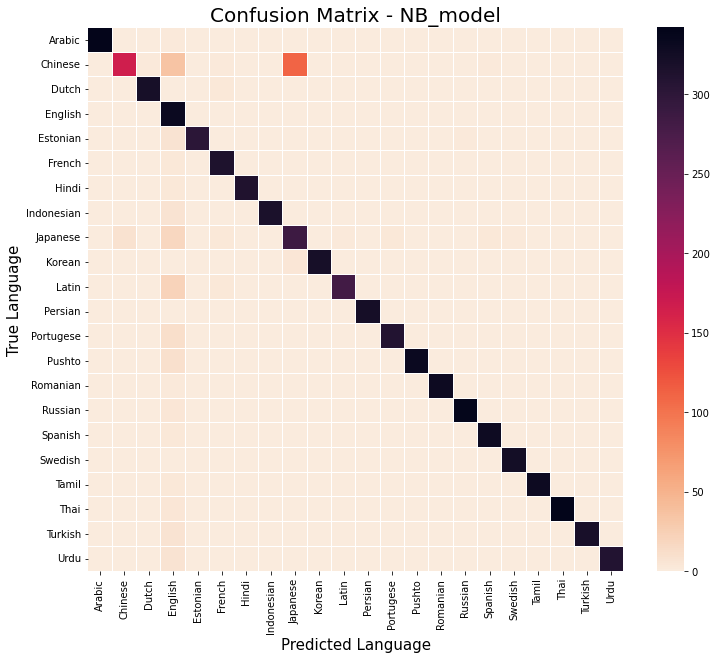

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - NB_model', Fontsize=20)
sns.heatmap(cm, xticklabels=language_list, yticklabels=language_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

## Linear SVC

In [26]:
from sklearn.svm import LinearSVC
model_SVC = LinearSVC()
model_SVC.fit(X_train, y_train)

LinearSVC()

In [27]:
model_SVC.score(X_test, y_test)

0.9563349043526477

In [28]:
y_pred2 = model_SVC.predict(X_test)

In [29]:
ac2 = accuracy_score(y_test, y_pred2)
cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)
print("Accuracy score: ", ac2)

Accuracy score:  0.9563349043526477


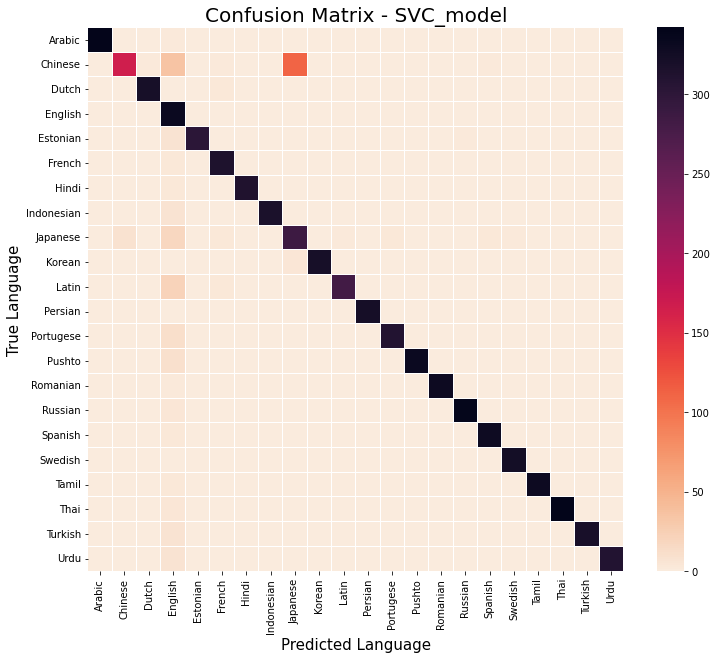

In [30]:
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - SVC_model', Fontsize=20)
sns.heatmap(cm, xticklabels=language_list, yticklabels=language_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

## Linear Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
model_LR.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [32]:
model_LR.score(X_test, y_test)

0.9462156917105627

In [33]:
y_pred3 = model_LR.predict(X_test)

In [34]:
ac3 = accuracy_score(y_test, y_pred3)
cm3 = confusion_matrix(y_test, y_pred3)
cr3 = classification_report(y_test, y_pred3)
print("Accuracy score: ", ac3)

Accuracy score:  0.9462156917105627


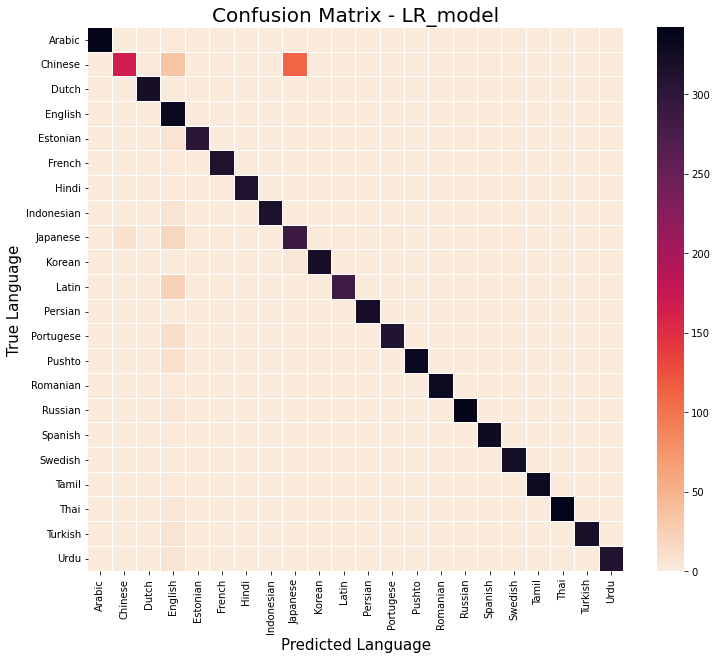

In [44]:
cm3 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - LR_model', Fontsize=20)
sns.heatmap(cm, xticklabels=language_list, yticklabels=language_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

## Multilayer Perceptrons (MLPs) Model

In [36]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [37]:
X_train.shape

(14645, 264808)

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(22, activation='softmax')
])

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
hist = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.3, 
    verbose=2)

Epoch 1/10
81/81 - 6s - loss: 1.1344 - accuracy: 0.8484 - val_loss: 0.2506 - val_accuracy: 0.9604 - 6s/epoch - 74ms/step
Epoch 2/10
81/81 - 2s - loss: 0.0505 - accuracy: 0.9952 - val_loss: 0.1456 - val_accuracy: 0.9663 - 2s/epoch - 30ms/step
Epoch 3/10
81/81 - 2s - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.1450 - val_accuracy: 0.9627 - 2s/epoch - 30ms/step
Epoch 4/10
81/81 - 2s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.1425 - val_accuracy: 0.9622 - 2s/epoch - 31ms/step
Epoch 5/10
81/81 - 2s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.1434 - val_accuracy: 0.9629 - 2s/epoch - 30ms/step
Epoch 6/10
81/81 - 2s - loss: 9.5837e-04 - accuracy: 0.9999 - val_loss: 0.1441 - val_accuracy: 0.9631 - 2s/epoch - 30ms/step
Epoch 7/10
81/81 - 2s - loss: 8.0110e-04 - accuracy: 0.9999 - val_loss: 0.1452 - val_accuracy: 0.9627 - 2s/epoch - 29ms/step
Epoch 8/10
81/81 - 2s - loss: 6.7763e-04 - accuracy: 0.9999 - val_loss: 0.1475 - val_accuracy: 0.9629 - 2s/epoch - 29ms/step
Epoch 9/10
81/81 - 2

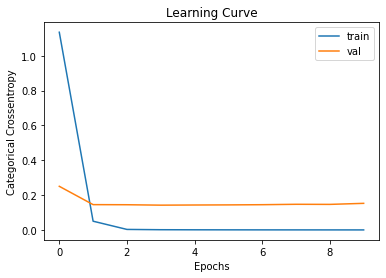

In [42]:
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

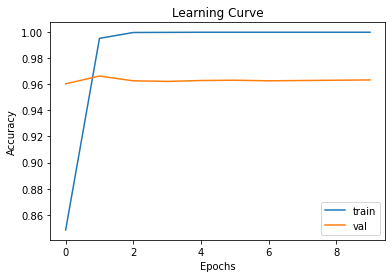

In [43]:
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()